### Import Necessary Libraries

In [1]:
# Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')


### Import the Dataset

In [2]:
df = pd.read_excel("D:\\UNIFIED PROJECTS\\Supermart Sales\\Supermart Grocery Sales - Retail Analytics Dataset.xlsx")
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD3160,Haseena,Bakery,Cakes,Cumbum,2018-04-06,Central,2491,0.26,1120.95,Tamil Nadu
1,OD3468,Verma,Fruits & Veggies,Fresh Fruits,Theni,2018-07-09,Central,2490,0.24,1120.50,Tamil Nadu
2,OD3437,Yadav,Bakery,Breads & Buns,Theni,2018-07-08,Central,2469,0.29,1111.05,Tamil Nadu
3,OD8135,Aditi,Bakery,Biscuits,Coimbatore,2017-06-23,East,2452,0.18,1103.40,Tamil Nadu
4,OD9783,Komal,Snacks,Cookies,Karur,2016-09-25,Central,2450,0.21,1102.50,Tamil Nadu


In [3]:
df.shape

(9994, 11)

In [4]:
df.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,Order Date,Sales,Discount,Profit
count,9994,9994.000000,9994.000000,9994.000000
mean,2017-04-11 12:33:42.973784320,1496.596158,0.226817,374.937082
min,2015-01-02 00:00:00,500.000000,0.100000,25.250000
25%,2016-05-01 00:00:00,1000.000000,0.160000,180.022500
50%,2017-05-30 00:00:00,1498.000000,0.230000,320.780000
75%,2018-04-09 00:00:00,1994.750000,0.290000,525.627500
max,2018-12-30 00:00:00,2500.000000,0.350000,1120.950000
std,NaN,577.559036,0.074636,239.932881


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Customer Name  9994 non-null   object        
 2   Category       9994 non-null   object        
 3   Sub Category   9994 non-null   object        
 4   City           9994 non-null   object        
 5   Order Date     9994 non-null   datetime64[ns]
 6   Region         9994 non-null   object        
 7   Sales          9994 non-null   int64         
 8   Discount       9994 non-null   float64       
 9   Profit         9994 non-null   float64       
 10  State          9994 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 859.0+ KB


In [8]:
df.dtypes

Order ID                 object
Customer Name            object
Category                 object
Sub Category             object
City                     object
Order Date       datetime64[ns]
Region                   object
Sales                     int64
Discount                float64
Profit                  float64
State                    object
dtype: object

In [9]:
df['Order Date']

0      2018-04-06
1      2018-07-09
2      2018-07-08
3      2017-06-23
4      2016-09-25
          ...    
9989   2017-05-19
9990   2015-11-26
9991   2015-12-16
9992   2018-10-30
9993   2017-09-20
Name: Order Date, Length: 9994, dtype: datetime64[ns]

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.dropna(inplace=True)

###  Change the Order Date column to Date type

In [12]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

In [13]:
df['Order Date'].isna().sum()

0

In [14]:
df.dtypes

Order ID                 object
Customer Name            object
Category                 object
Sub Category             object
City                     object
Order Date       datetime64[ns]
Region                   object
Sales                     int64
Discount                float64
Profit                  float64
State                    object
dtype: object

### Create new columns for Year, Month and Day

In [15]:
df['Order_Day'] = df['Order Date'].dt.day
df['Order_Month'] = df['Order Date'].dt.month
df['Order_Year'] = df['Order Date'].dt.year

In [16]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order_Day,Order_Month,Order_Year
0,OD3160,Haseena,Bakery,Cakes,Cumbum,2018-04-06,Central,2491,0.26,1120.95,Tamil Nadu,6,4,2018
1,OD3468,Verma,Fruits & Veggies,Fresh Fruits,Theni,2018-07-09,Central,2490,0.24,1120.50,Tamil Nadu,9,7,2018
2,OD3437,Yadav,Bakery,Breads & Buns,Theni,2018-07-08,Central,2469,0.29,1111.05,Tamil Nadu,8,7,2018
3,OD8135,Aditi,Bakery,Biscuits,Coimbatore,2017-06-23,East,2452,0.18,1103.40,Tamil Nadu,23,6,2017
4,OD9783,Komal,Snacks,Cookies,Karur,2016-09-25,Central,2450,0.21,1102.50,Tamil Nadu,25,9,2016


In [17]:
df[df['Order ID'] == 'OD3437']

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order_Day,Order_Month,Order_Year
2,OD3437,Yadav,Bakery,Breads & Buns,Theni,2018-07-08,Central,2469,0.29,1111.05,Tamil Nadu,8,7,2018


### Exploratory Data Analysis (EDA)

### Sales by Category

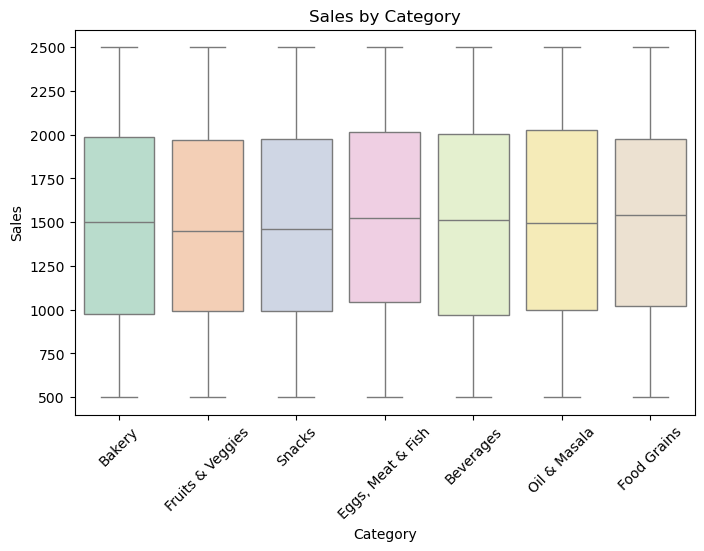

In [18]:
# Sales by Category
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Category', y='Sales', palette='Pastel2')
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

### Top 5 Cities by Sales

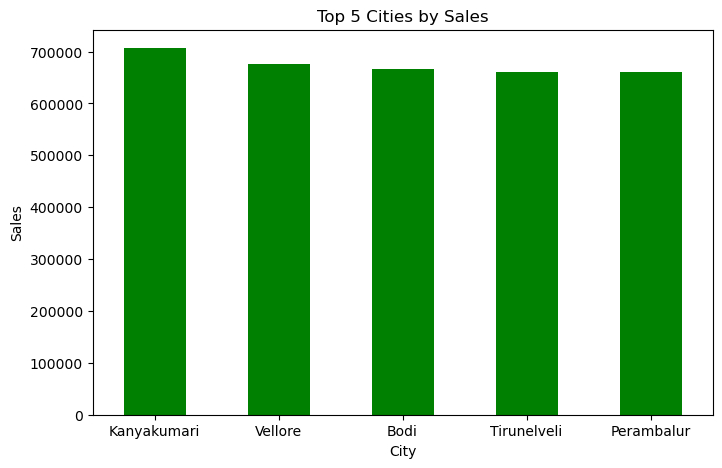

In [19]:
# Top 5 Cities by Sales
top5_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(8,5))
top5_cities.plot(kind='bar', color='green')
plt.title('Top 5 Cities by Sales')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.show()

- Kantakumari and Vellore cities has the more number of Sales.

### Total Sales by Category

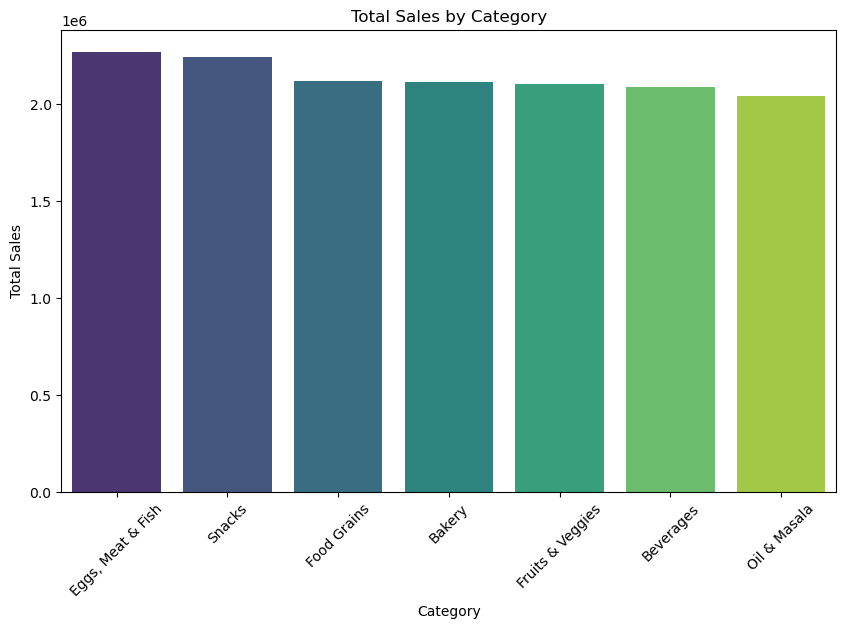

In [20]:
# Sum of Sales for each Category
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

# Bar Graph
plt.figure(figsize=(10,6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

- Eggs, Meat & Fish and Snacks are the most selling categories.

### Sales Over Time

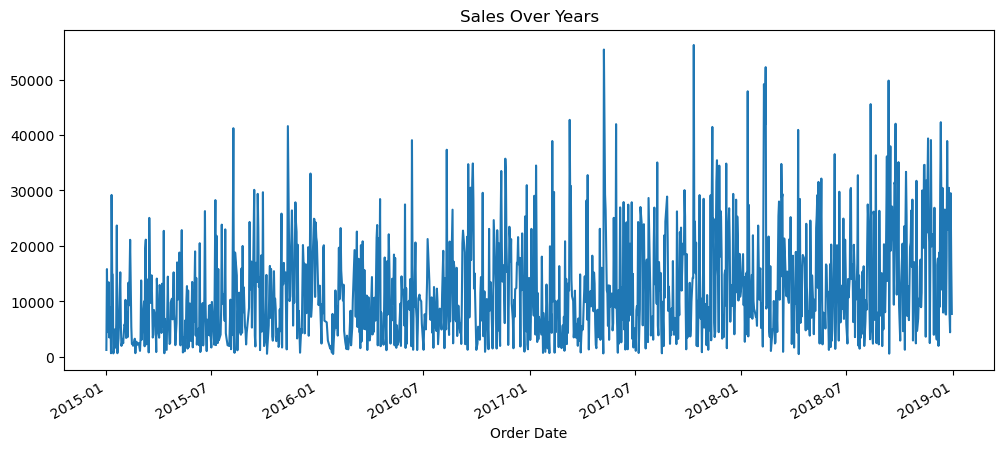

In [21]:
# Total Sales Trend
plt.figure(figsize=(12,5))
df.groupby('Order Date')['Sales'].sum().plot()
plt.title('Sales Over Years')
plt.show()

### Monthly wise Sales

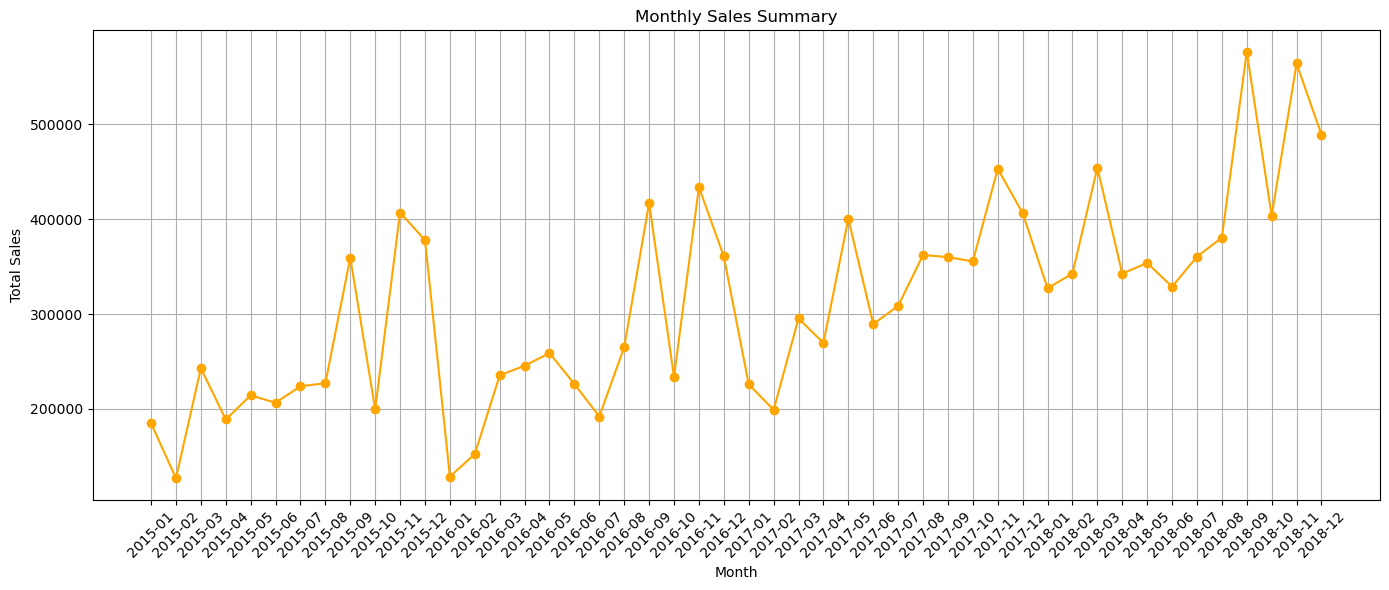

In [22]:
# Group by Order_Year and Order_Month 
monthly_sales = df.groupby(['Order_Year', 'Order_Month'])['Sales'].sum().reset_index()

# Combine Year and Month
monthly_sales['Year_Month'] = monthly_sales['Order_Year'].astype(str) + '-' + monthly_sales['Order_Month'].astype(str).str.zfill(2)

# Plotting the monthly sales
plt.figure(figsize=(14,6))
plt.plot(monthly_sales['Year_Month'], monthly_sales['Sales'], marker='o', color='orange')
plt.xticks(rotation=45)
plt.title("Monthly Sales Summary")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.grid(True)
plt.show()


- Monthly sales have shown steady growth over the four-year period.
- In the Years 2015 - 2016 there are less totals.
- High Sales started from ending 2017 and throughout 2018.
- Sales are increasing Year-Over-Year with a consistent trend.

### Quarterly wise Sales

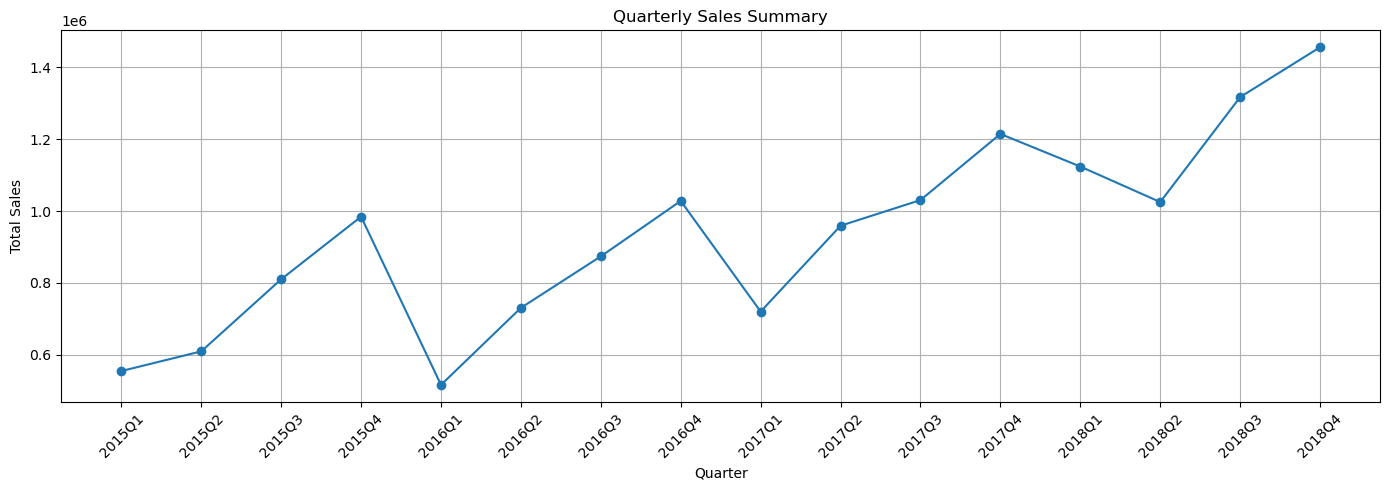

In [23]:
# Create necessary time-based and category columns
df['Order_Quarter'] = df['Order Date'].dt.to_period('Q')

# Quarterly Sales Summary
quarterly_sales = df.groupby('Order_Quarter')['Sales'].sum().reset_index()
quarterly_sales['Order_Quarter'] = quarterly_sales['Order_Quarter'].astype(str)

# Plotting Quarterly Sales
plt.figure(figsize=(14,5))
plt.plot(quarterly_sales['Order_Quarter'], quarterly_sales['Sales'], marker='o', linestyle='-')
plt.title("Quarterly Sales Summary")
plt.xlabel("Quarter")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


- Overall there's a clear upward trend in quarterly sales from 2015 to 2018.
- The highest recorded sales occurred in Q4 2018, with more than 1.45 million.
- Sales began at 0.6 million in Q1 2015 and more than doubled by Q4 2018.
- we can see that all the Quarte 4's has the peak this means the sales are high at the year ending.

### Correlation Heatmap

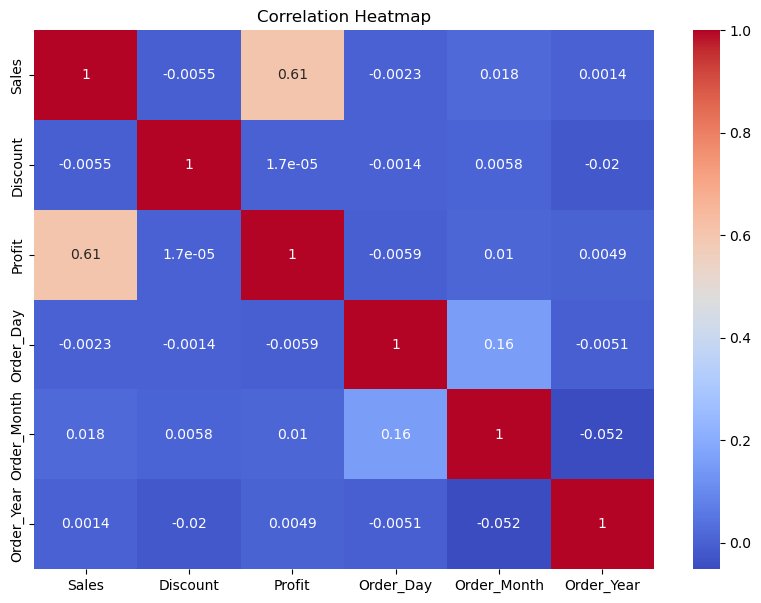

In [24]:
# Selecting only numerical columns
numeric_data = df.select_dtypes(include=[np.number])

# Heatmap
plt.figure(figsize=(10,7))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

- Only sales and profit has the highest positive relationship.

### Distribution of Sales by Year

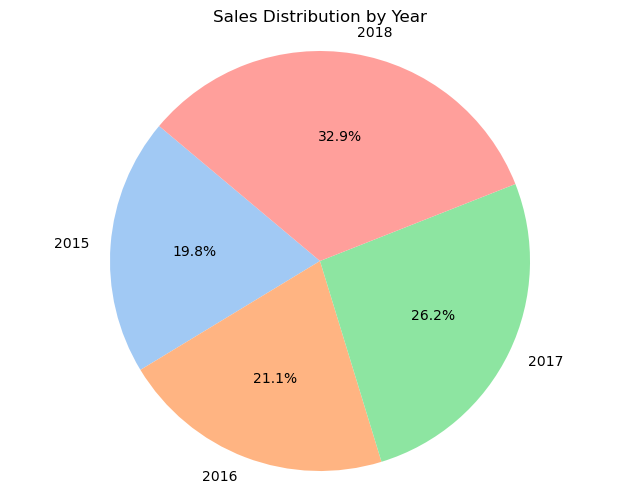

In [25]:
# Group sales by year
yearly_sales = df.groupby('Order_Year')['Sales'].sum()

# Pie Chart
plt.figure(figsize=(8,6))
plt.pie(yearly_sales, labels=yearly_sales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Sales Distribution by Year')
plt.axis('equal')
plt.show()

- 2018 has the highest Sales contribution followed by 2017.

### Label Encoding Categorical Columns

In [26]:
# Encode categorical features

encoder = LabelEncoder()
categoricals = ['Category', 'Sub Category', 'City', 'Region', 'State']
for feature in categoricals:
    df[feature] = encoder.fit_transform(df[feature])

In [27]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order_Day,Order_Month,Order_Year,Order_Quarter
0,OD3160,Haseena,0,3,3,2018-04-06,0,2491,0.26,1120.95,0,6,4,2018,2018Q2
1,OD3468,Verma,4,11,18,2018-07-09,0,2490,0.24,1120.50,0,9,7,2018,2018Q3
2,OD3437,Yadav,0,2,18,2018-07-08,0,2469,0.29,1111.05,0,8,7,2018,2018Q3
3,OD8135,Aditi,0,1,2,2017-06-23,1,2452,0.18,1103.40,0,23,6,2017,2017Q2
4,OD9783,Komal,6,6,7,2016-09-25,0,2450,0.21,1102.50,0,25,9,2016,2016Q3


### Boxplot of Profit to Check Outliers

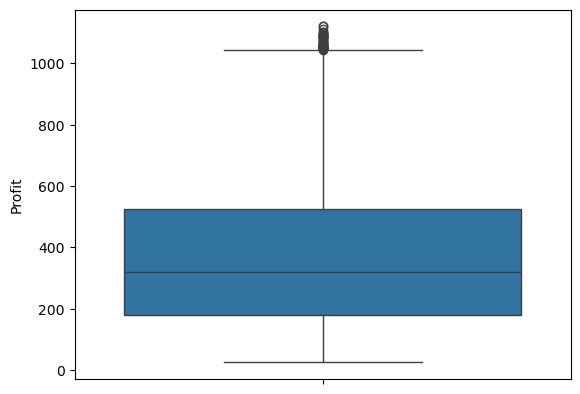

In [28]:
sns.boxplot(df['Profit'])
plt.show()

- The figure shows more number of outliers beyond the upper whisker length.

### Removing Outliers

In [29]:
# Repeat IQR removal until no outliers are left
while True:
    Q1 = df['Profit'].quantile(0.25)
    Q3 = df['Profit'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    initial_shape = df.shape[0]
    df = df[(df['Profit'] >= lower) & (df['Profit'] <= upper)]
    if df.shape[0] == initial_shape:
        break 


In [30]:
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['Profit'] < lower_bound) | (df['Profit'] > upper_bound)]

print(f'Number of outliers in Profit: {outliers.shape[0]}')


Number of outliers in Profit: 0


### Size of data after removing Outliers

In [31]:
df.shape

(9931, 15)

### We can see Outliers are removed in the below fig

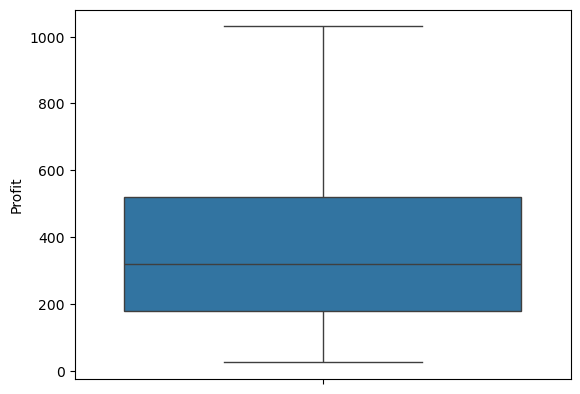

In [32]:
sns.boxplot(df['Profit'])
plt.show()

<Axes: >

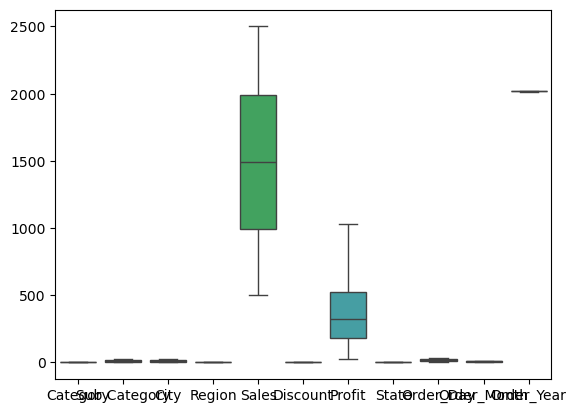

In [33]:
sns.boxplot(df)

- The figure shows only profit and sales are contributing for the model building.

### Model Building

In [34]:
# Manual Feature Selection
# Removing unnecessary columns and selecting the best columns for model building.

X = df.drop(columns=['Order ID', 'Customer Name', 'Order Date', 'Sales', 'State', 'Region'])
y = df['Sales']

### Spliting Data into Training and Testing

In [35]:
# Data Splitting and Scaling

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

TypeError: float() argument must be a string or a real number, not 'Period'

### Model Training with all models

### Linear Regression

In [ ]:
# Linear Regression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

### Random Forest Regressor

In [ ]:
# Random Forest

rf = RandomForestRegressor(n_estimators=300, max_depth=20, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

### XGBoost Regressor

In [ ]:
# XGBoost Regressor

xgb = XGBRegressor()
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

### Model Evaluation

In [ ]:
print("\nLinear Regression Results:")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_lr):.2f}")

print("\nRandom Forest Results:")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_rf):.2f}")

print("\nXgboost  Results:")
print(f"MSE: {mean_squared_error(y_test, y_pred_xgb):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_xgb):.2f}")

- As profit is the only one column contributing to predict Sales, so the models are not performing well.
- So we need to add new columns which will help us in predicting the Sales Accurately.

### Feature Engineering

In [ ]:
# Feature importance
importances = xgb.feature_importances_
feature_names = X.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(8,6))
feat_imp.plot(kind='barh', color='skyblue')
plt.title('Feature Importance -  XG-Boost')
plt.gca().invert_yaxis()
plt.show()


- From the above graph we can conclude only Profit is more important and Order Month and Discount are least important.

### We need to add new columns which helps us to predict the Sales corretly from the existing important columns .

In [ ]:
df1 = X.copy()

In [ ]:
df1['Sales'] = df['Sales']

In [ ]:
df1

### Adding New Columns

In [ ]:
# 1. Profit Margin
df1['Profit_Margin'] = df['Profit'] / df['Sales']

# 2. High Season Flag
high_season_months = [10, 11, 12]
df1['High_Season'] = df['Order_Month'].apply(lambda x: 1 if x in high_season_months else 0)

# 3. City Popularity
city_sales = df.groupby('City')['Sales'].sum()
df1['City_Sales_Sum'] = df['City'].map(city_sales)

# 4. Days Since Order
latest_date = df['Order Date'].max()
df1['Days_Since_Order'] = (latest_date - df['Order Date']).dt.days


In [ ]:
df1

### Kept the original dataset with new columns as it can be used to plot required graphs and took a new Dataframe.

In [ ]:
df2 = df1.copy()

### Model Building with the added new columns.

In [ ]:
# Feature Selection for Modeling
X1 = df2.drop(columns=['Sales'])
y1 = df2['Sales']

In [ ]:
y1.head()

In [ ]:
# Train-Test Split and Scaling
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

### Standardization

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 1. Linear Regression

In [ ]:
# 1.Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

### 2. Random Forest Regressor

In [ ]:
# 2.Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

### 3. XGBOOST Regressor

In [ ]:
# 3.XGBoost with best parameters from tuning
xgb_model = XGBRegressor(n_estimators=50, max_depth=3, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

### Model Evaluation

In [ ]:
# Linear Regression Metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("\nLinear Regression Results:")
print(f"MSE: {mse_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R2 Score: {r2_lr:.2f}")

# Random Forest Metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Results:")
print(f"MSE: {mse_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R2 Score: {r2_rf:.2f}")

# XGBoost Metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\nXGBoost Results:")
print(f"MSE: {mse_xgb:.2f}")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"R2 Score: {r2_xgb:.2f}")

### Random Forest Regressor has the least RMSE value and highest R2 score so this is the best model with no errors.

### Actual vs Predicted Scatter plot - Linear Regression

In [ ]:
# Actual vs Predicted

# Linear Regression Plot
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted - Linear Regression')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

### Actual vs Predicted Scatter plot - Random Forest

In [ ]:
# Random Forest Plot

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted - Random Forest')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

### Actual vs Predicted Scatter plot - XG-Boost

In [ ]:
# Linear Regression Plot

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_xgb, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted - XG-Boost')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

### KFold Cross Validation

In [ ]:
# Used same model for cross validation also
rf = RandomForestRegressor(n_estimators=300, random_state=42)

# Setup K-Fold cross-validator
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Run cross-validation for Random Forest
rf_mse_scores = cross_val_score(rf, X1, y1, scoring=mse_scorer, cv=cv)
rf_r2_scores = cross_val_score(rf, X1, y1, scoring=r2_scorer, cv=cv)

# Print average results
print("\nRandom Forest Cross-Validation:")
print(f"Avg MSE: {-np.mean(rf_mse_scores):.2f}")
print(f"Avg R² Score: {np.mean(rf_r2_scores):.4f}")


- Trained and evaluated regression models to predict sales.
- Used 5-fold cross-validation to assess generalization.
- Random Forest achieved best results with 
- Demonstrated strong model stability and accuracy, confirming Random Forest as the final production model.